In [60]:
import pandas_datareader as rd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import probplot
from scipy.stats import t
from scipy.stats import jarque_bera, normaltest
from scipy.stats import kstest
from scipy.stats import ttest_1samp

In [4]:
#Get the stock quote
apple = rd.DataReader('AAPL', data_source='yahoo', start='1980-01-01', end='2021-01-01')
apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.100323
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095089
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088110
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090291
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.092908
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994507
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679657
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873077


In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10100 entries, 1980-12-12 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       10100 non-null  float64
 1   Low        10100 non-null  float64
 2   Open       10100 non-null  float64
 3   Close      10100 non-null  float64
 4   Volume     10100 non-null  float64
 5   Adj Close  10100 non-null  float64
dtypes: float64(6)
memory usage: 552.3 KB


In [6]:
apple.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

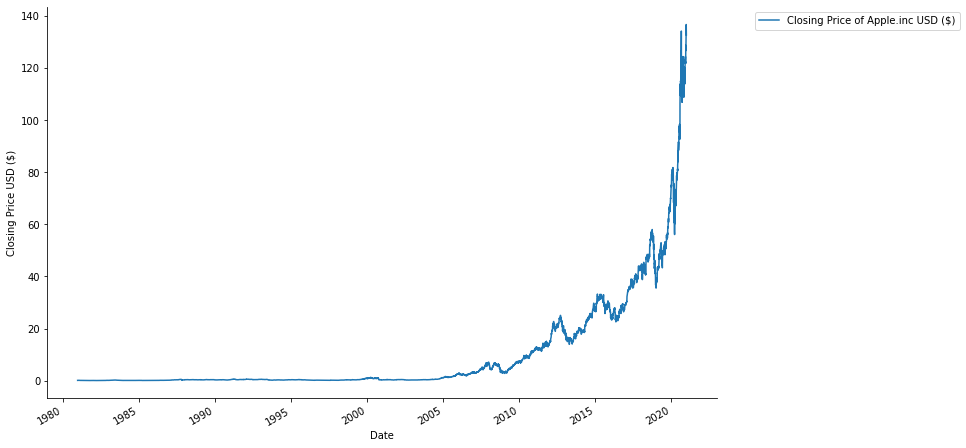

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
apple['Close'].plot()

plt.legend(['Closing Price of Apple.inc USD ($)',],
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
sns.despine();

In [18]:
apple['prev_close'] = apple['Close'].shift(1)
apple['stock_return'] = apple['Close']/apple['prev_close'] - 1
apple['logged_stock_return'] = np.log1p(apple['stock_return'])
apple

,High,Low,Open,Close,Volume,Adj Close,prev_close,stock_return,logged_stock_return
Date,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.100323,NaN,NaN,NaN
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095089,0.128348,-0.052171,-0.053581
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088110,0.121652,-0.073398,-0.076231
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090291,0.112723,0.024751,0.024450
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.092908,0.115513,0.028992,0.028580
...,...,...,...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994507,130.960007,0.007712,0.007683
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679657,131.970001,0.035766,0.035141
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873077,136.690002,-0.013315,-0.013404


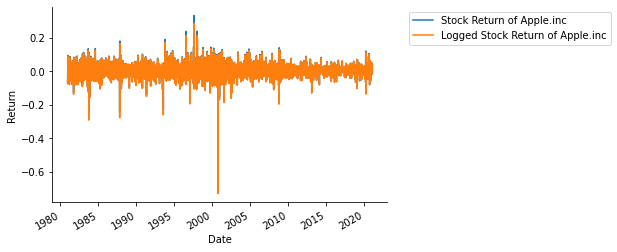

In [47]:
apple['stock_return'].plot()
apple['logged_stock_return'].plot()

plt.legend(['Stock Return of Apple.inc',
            'Logged Stock Return of Apple.inc'],
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Date')
plt.ylabel('Return')
sns.despine();

In [24]:
expected_return = apple['stock_return'].mean()
volitility = apple['stock_return'].std()

print(f'Excepted return of AAPL: {expected_return}')
print(f'Volitility of AAPL: {volitility}')

Excepted return of AAPL: 0.0011052586231965226
Volitility of AAPL: 0.02865297187226164


# Distribution

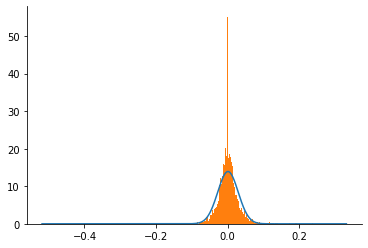

In [46]:
x = np.linspace(
    apple['stock_return'].min(), 
    apple['stock_return'].max(), 
    1000
)
y = norm.pdf(
    x, 
    loc=apple['stock_return'].mean(), 
    scale=apple['stock_return'].std()
)

plt.plot(x, y);
apple['stock_return'].hist(bins=1000, density=True);
plt.grid(False)
sns.despine()

# QQ-plot

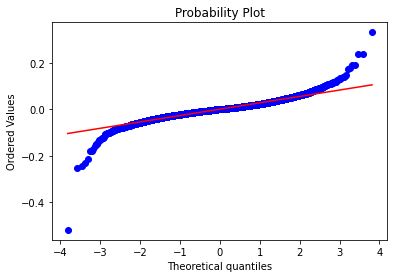

In [38]:
probplot(apple['stock_return'].dropna(), dist='norm', fit=True, plot=plt);

# T-Distribution

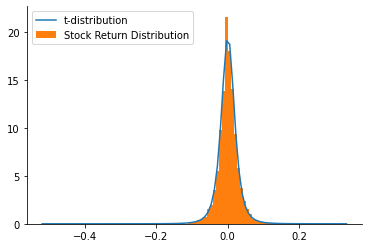

In [44]:
dof, loc, scale = t.fit(apple['stock_return'].dropna())

x_list = np.linspace(apple['stock_return'].min(), apple['stock_return'].max(), 100)
y_list = t.pdf(x_list, dof, loc, scale)

plt.plot(x_list, y_list)
apple['stock_return'].hist(bins=100, density=True);

plt.grid(False)
plt.legend([ 't-distribution','Stock Return Distribution'])
sns.despine()

In [48]:
skewness = apple['stock_return'].skew()
kurtosis = apple['stock_return'].kurtosis() # greater than 3 == extreme returns and risk 

print(f'Skewness of AAPL: {skewness}')
print(f'Kurtosis of AAPL: {kurtosis}')

Skewness of AAPL: -0.3802422925218057
Kurtosis of AAPL: 17.90998434926715


# Statistical Test
Both Jarque Bera and Normal Test check the normality of the given data

## Jarque Bera

In [53]:
values = apple['stock_return'].dropna().to_numpy()

# The Jarque Bera function returns a test statistics and the p-value
jarque_bera(values) 

# test stats is large, p-value is very small.
# Hence, we reject the null hypothesis that 
# the data comes from a normal distribution.

Jarque_beraResult(statistic=135077.04346823748, pvalue=0.0)

## Normal Test

In [54]:
# # The Normal Test function also returns a test statistics and the p-value
normaltest(values)

# Again, the p-value of the test is lower than the threshold.
# Hence, we the reject null hypothesis that data do not come from normal distribution

NormaltestResult(statistic=2582.6580745336305, pvalue=0.0)

## Kolmogorov-Smirnov Test

In [59]:
# In order for the Kolmogorov-Smirnov test to work
# we need to feed in a cumulative dense function
def cdf(x):
    return t.cdf(x, dof, loc, scale)

# To test if the data comes from a t-distribution
dof, loc, scale = t.fit(apple['logged_stock_return'].dropna())

kstest(values, cdf)

# Since p-value of the test is small than the threshold,
# we reject the hypothesis that the data comes from a t-distribution

KstestResult(statistic=0.01862069490997087, pvalue=0.0017947104111641736)

## ttest_1samp

In [61]:
# Calculate the T-test for the mean of ONE group of scores.
ttest_1samp(values, 0)

# The p-value of the test is smaller than the threshold.
# Hence, we reject the hypothesis that 
# the expected value (mean) of a sample of 
#independent observations a is equal to the 
# given population mean.

Ttest_1sampResult(statistic=3.876443198103237, pvalue=0.00010666573216430649)